# NOAA Tides & Currents
- Sewells Point: https://tidesandcurrents.noaa.gov/inventory.html?id=8638610
- https://pypi.org/project/noaa-coops/
- product: https://api.tidesandcurrents.noaa.gov/api/prod/#products
- datum: https://api.tidesandcurrents.noaa.gov/api/prod/#datum:~:text=for%20the%20station-,Datum,-The%20datum%20can
- Output columns ['v', 's', 'f', 'q'] https://api.tidesandcurrents.noaa.gov/api/prod/responseHelp.html

In [1]:
# !pip install noaa_coops
from noaa_coops import Station
import pandas as pd
from pprint import pprint

# Sewells Point station
station_id = "8638610"
station = Station(station_id)
pprint(station.data_inventory)

{'Air Temperature': {'end_date': '2025-04-18 03:36',
                     'start_date': '1996-01-11 06:00'},
 'Barometric Pressure': {'end_date': '2025-04-18 03:36',
                         'start_date': '1996-01-11 06:00'},
 'Preliminary 6-Minute Water Level': {'end_date': '2025-04-18 03:36',
                                      'start_date': '2001-01-01 00:00'},
 'Rain Fall': {'end_date': '2002-02-08 20:00',
               'start_date': '1996-01-11 06:00'},
 'Verified 6-Minute Water Level': {'end_date': '2025-03-31 23:54',
                                   'start_date': '1995-12-12 21:48'},
 'Verified High/Low Water Level': {'end_date': '2025-03-31 23:54',
                                   'start_date': '1979-08-01 07:12'},
 'Verified Hourly Height Water Level': {'end_date': '2025-03-31 23:00',
                                        'start_date': '1927-07-22 05:00'},
 'Verified Monthly Mean Water Level': {'end_date': '2025-03-31 23:54',
                                       'st

In [2]:
 # pprint(list(station.metadata.items()))

In [3]:
data = station.get_data(
    begin_date='20150101',
    end_date='20160101',
    product='water_level',
    datum='MHHW', # Mean Higher High Water
    units='metric',
    time_zone='lst', # gmt, lst_ldt
)

In [4]:
display(data.head()) # 6 minute intervals

,v,s,f,q
t,,,,
2015-01-01 00:00:00,-0.855,0.002,"0,0,0,0",v
2015-01-01 00:06:00,-0.849,0.002,"0,0,0,0",v
2015-01-01 00:12:00,-0.843,0.002,"0,0,0,0",v
2015-01-01 00:18:00,-0.835,0.003,"0,0,0,0",v
2015-01-01 00:24:00,-0.827,0.002,"0,0,0,0",v


# NWIS
### Stations near LaRC
- Not all stations have useful parameters
- Brick Kiln Creek Below Route 172 Near Poquoson, VA - 0167862550:
    - https://waterdata.usgs.gov/monitoring-location/0167862550/#dataTypeId=continuous-62620-0&period=P7D&showMedian=true
- Hampton River at Route 351 at Hampton, VA - 0204289985:
    - https://waterdata.usgs.gov/monitoring-location/0204289985/#dataTypeId=continuous-62620-0&period=P7D&showMedian=true
- James River at Fort Monroe, VA - 0204289994:
    - https://waterdata.usgs.gov/monitoring-location/0204289994/#dataTypeId=continuous-62620-0&period=P7D&showMedian=true
- Newmarket Creek at Mercury Blvd at Hampton, VA - 0167892964:
    - https://waterdata.usgs.gov/monitoring-location/0167892964/#dataTypeId=continuous-62620-0&period=P7D&showMedian=true
- Storm Drain at Coliseum Drive at Hampton, VA - 0167891721:
    - https://waterdata.usgs.gov/monitoring-location/0167891721/#dataTypeId=continuous-00065-0&period=P7D&showMedian=false
- Storm Drain West of Garrett Drive at Hampton, VA - 0167889257:
    - https://waterdata.usgs.gov/monitoring-location/0167889257/#dataTypeId=continuous-00065-0&period=P7D&showMedian=false
- 59D 25 Sow 213 - 365756076251201:
    - https://waterdata.usgs.gov/monitoring-location/365756076251201/#dataTypeId=continuous-72019-0&period=P7D&showMedian=true
### parameters
- https://doi-usgs.github.io/dataretrieval-python/examples/index.html
- https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY
    - 00061, 00035, 00036, 00045, ...
 


In [5]:
import pandas as pd
from geopy.distance import geodesic
import dataretrieval.nwis as nwis

coord = (37.0862, -76.3809) # LaRC
param_codes = {
    '00061': 'Discharge',
    '00035': 'Wind Speed',
    '00036': 'Wind Direction',
    '00045': 'Precipitation'
}

results = []

for code, desc in param_codes.items():
    site_data, _ = nwis.what_sites(stateCd='VA', parameterCd=code)
    site_data = site_data.dropna(subset=['dec_lat_va', 'dec_long_va'])
    site_data['distance_km'] = site_data.apply(
        lambda row: geodesic(coord, (row['dec_lat_va'], row['dec_long_va'])).km, axis=1)
    nearest = site_data.sort_values('distance_km').head()
    nearest['param_code'] = code
    nearest['param_desc'] = desc
    results.append(nearest[['site_no', 'station_nm', 'dec_lat_va', 'dec_long_va', 'distance_km', 'param_code', 'param_desc']])

final_df = pd.concat(results).reset_index(drop=True)
display(final_df)


,site_no,station_nm,dec_lat_va,dec_long_va,distance_km,param_code,param_desc
0,0167891721,"STORM DRAIN AT COLISEUM DRIVE AT HAMPTON, VA",37.037694,-76.386111,5.403004,00061,Discharge
1,0167885050,"UNNAMED TRIB TO NEWMARKET CREEK AT HAMPTON, VA",37.050978,-76.442536,6.732417,00061,Discharge
2,0167889257,"STORM DRAIN WEST OF GARRETT DRIVE AT HAMPTON, VA",37.018497,-76.393528,7.597060,00061,Discharge
3,0204279294,"STORM DRAIN AT LAKEWOOD PK DR NR NEWPORT NEWS, VA",37.102550,-76.544431,14.650918,00061,Discharge
4,02042790,"BEAVERDAM CREEK NEAR YORKTOWN, VA",37.202645,-76.520785,17.929204,00061,Discharge
5,365119076174600,"THE HAGUE AT PEDESTRIAN BRIDGE AT NORFOLK, VA",36.855269,-76.296169,26.715536,00035,Wind Speed
6,365123107613412,"ELIZABETH RIVER AT CROWN POINT NORFOLK, VA",36.856537,-76.227772,28.905495,00035,Wind Speed
7,0204288721,EB ELIZABETH RIVER AT RT 165 AT VIRGINIA BEACH...,36.827370,-76.165214,34.555381,00035,Wind Speed
8,0204291317,"THALIA CREEK AT ROUTE 58 AT THALIA, VA",36.843306,-76.124472,35.328055,00035,Wind Speed
9,0204293125,LONDON BRIDGE CREEK AT RT 58 AT VIRGINIA BEACH...,36.841139,-76.057139,39.634868,00035,Wind Speed


In [6]:
# # first import the functions for downloading data from NWIS
# import dataretrieval.nwis as nwis

# # specify the USGS site code for which we want data.
# site = ['0167862550', '0204289985', '0167892964', '0167891721', '0167889257', '365756076251201']


# # get instantaneous values (iv)
# df = nwis.get_record(sites=site, service='iv', start='2017-12-31', end='2018-01-01')

# # get water quality samples (qwdata)
# # df2 = nwis.get_qwdata(sites=site)

# # get basic info about the site
# df3 = nwis.get_record(sites=site, service='site')

# Meteostat
- https://dev.meteostat.net/python/daily.html#data-structure
### Example: 2016
Looks like it matches these storms. not sure which station data is from
- September 2-3, 2016 Tropical Storm Hermine https://www.weather.gov/mhx/hermine_090216
- September 11 – 23, 2016: Tropical Storm Julia https://www.wpc.ncep.noaa.gov/tropical/rain/julia2016.html
- October 8, 2016: Hurricane Matthew https://www.weather.gov/ilm/matthew 

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2016-01-01,8.8,5.9,11.2,0.0,NaN,344.0,11.0,NaN,1020.0,NaN
2016-01-02,5.5,0.3,10.2,0.0,NaN,277.0,9.1,NaN,1020.6,NaN
2016-01-03,6.0,3.3,9.8,0.0,NaN,NaN,13.0,NaN,1014.2,NaN
2016-01-04,2.9,-1.3,5.6,0.0,NaN,358.0,22.7,NaN,1018.8,NaN
2016-01-05,-3.5,-6.4,-0.2,0.0,NaN,358.0,16.5,NaN,1034.9,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-12-27,15.2,10.5,18.4,0.0,NaN,220.0,22.6,NaN,1018.3,NaN
2016-12-28,7.9,3.7,14.2,0.0,NaN,NaN,10.0,NaN,1020.4,NaN
2016-12-29,8.8,5.9,13.6,3.0,NaN,228.0,11.0,NaN,1010.3,NaN


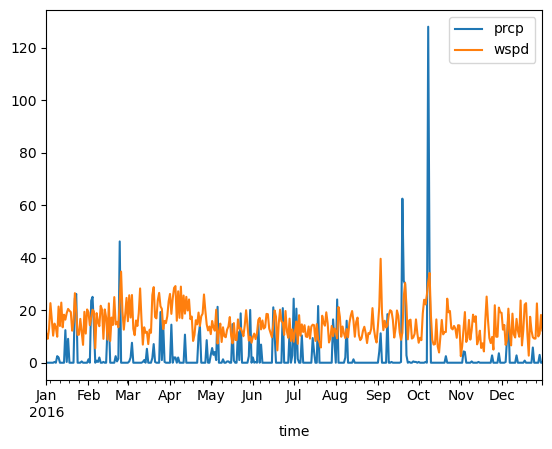

In [7]:
# !pip install meteostat
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

# Set time period
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)

larc = Point(37.0862, -76.3809)

# Get daily data for 2018
data = Daily(larc, start, end)
data = data.fetch()
display(data)

data.plot(y=['prcp', 'wspd'])
plt.show()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2016-01-01 00:00:00,12.2,9.9,86.0,NaN,NaN,80.0,9.4,NaN,1019.4,NaN,NaN
2016-01-01 01:00:00,11.5,9.2,86.0,0.0,NaN,60.0,9.4,NaN,1020.3,NaN,NaN
2016-01-01 02:00:00,11.4,9.5,88.0,0.0,NaN,30.0,5.4,NaN,1021.0,NaN,NaN
2016-01-01 03:00:00,10.8,8.9,88.0,0.0,NaN,150.0,0.0,NaN,1020.3,NaN,NaN
2016-01-01 04:00:00,11.1,9.8,92.0,0.0,NaN,40.0,1.8,NaN,1020.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 20:00:00,6.1,-6.5,40.0,0.0,NaN,300.0,20.5,NaN,1014.6,NaN,NaN
2016-12-30 21:00:00,6.1,-5.6,43.0,0.0,NaN,310.0,9.4,NaN,1014.9,NaN,NaN
2016-12-30 22:00:00,5.2,-7.0,41.0,0.0,NaN,290.0,16.6,NaN,1016.2,NaN,NaN


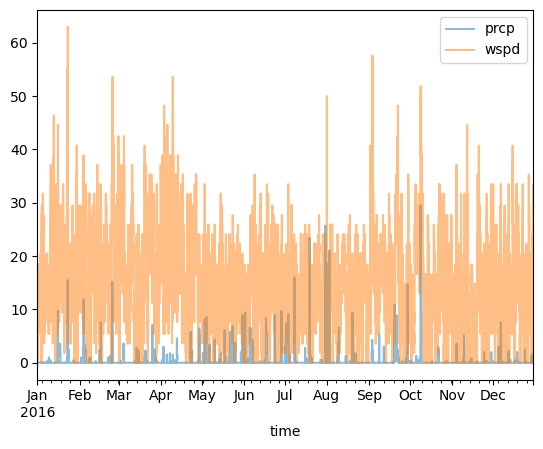

In [8]:

larc = Point(37.0862, -76.3809)

# Get daily data for 2018
data = Hourly(larc, start, end)
data = data.fetch()
display(data)

data.plot(y=['prcp', 'wspd'], alpha=0.5)
plt.show()